In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
class Vector2:
    def __init__(self, x=0., y=0.):
        self.x = x
        self.y = y
        
    def set(self, x, y):
        self.x = x
        self.y = y

In [21]:
#メッシュの定義
a = Vector2(-0.4, 0.0)
b = Vector2( 0.0, 0.0)
c = Vector2( 0.0, 0.4)
d = Vector2(-0.4, 0.4)


In [61]:
def getMeshParam(a, b, c, d):
    #メッシュの中心と長さを出す
    center = Vector2((a.x + b.x + c.x + d.x) / 4, (a.y + b.y + c.y + d.y) / 4)
    l = (c.x - a.x) / 2
    return center, l

In [62]:
def drawMesh(fig, a, b, c, d, color="black"):
    #ABC
    fig.plot([a.x, b.x], [a.y, b.y], color=color)
    fig.plot([b.x, c.x], [b.y, c.y], color=color)
    fig.plot([c.x, d.x], [c.y, d.y], color=color)
    fig.plot([d.x, a.x], [d.y, a.y], color=color)
    fig.text(a.x*1.04, a.y*1.04, "a", horizontalalignment='center', verticalalignment='center', color=color)
    fig.text(b.x*1.04, b.y*1.04, "b", horizontalalignment='center', verticalalignment='center', color=color)
    fig.text(c.x*1.04, c.y*1.04, "c", horizontalalignment='center', verticalalignment='center', color=color)
    fig.text(d.x*1.04, d.y*1.04, "d", horizontalalignment='center', verticalalignment='center', color=color)

    fig.set_xlim(-0.5, 0.1)
    fig.set_ylim(-0.1, 0.5)

In [63]:
p = Vector2(-0.15, 0.25)

In [71]:
# fig = plt.subplot()
# drawMesh(fig, a, b, c, d)
# plt.plot(p.x, p.y, "o")
# fig.set_aspect('equal')
# plt.show()

In [102]:
def calcParam(o, p, l):
    op = Vector2(p.x-o.x, p.y-o.y)
    s = op.x / l
    t = op.y / l
    return s, t

In [103]:
o, l = getMeshParam(a, b, c, d)
print(o.x, o.y, l)
s, t = calcParam(o, p, l)
print(s, t)

-0.2 0.2 0.2
0.25000000000000006 0.24999999999999994


In [104]:
def calcPosition(a, b, c, d, o, s, t):
    oa = Vector2(a.x-o.x, a.y-o.y)
    ob = Vector2(b.x-o.x, b.y-o.y)
    oc = Vector2(c.x-o.x, c.y-o.y)
    od = Vector2(d.x-o.x, d.y-o.y)
    
    p_new = Vector2(o.x + 0.25 * ((1-s)*(1-t)*oa.x+(1+s)*(1-t)*ob.x+(1+s)*(1+t)*oc.x+(1-s)*(1+t)*od.x),
                    o.y + 0.25 * ((1-s)*(1-t)*oa.y+(1+s)*(1-t)*ob.y+(1+s)*(1+t)*oc.y+(1-s)*(1+t)*od.y))
    return p_new

In [105]:
p_new = calcPosition(a, b, c, d, o, s, t)

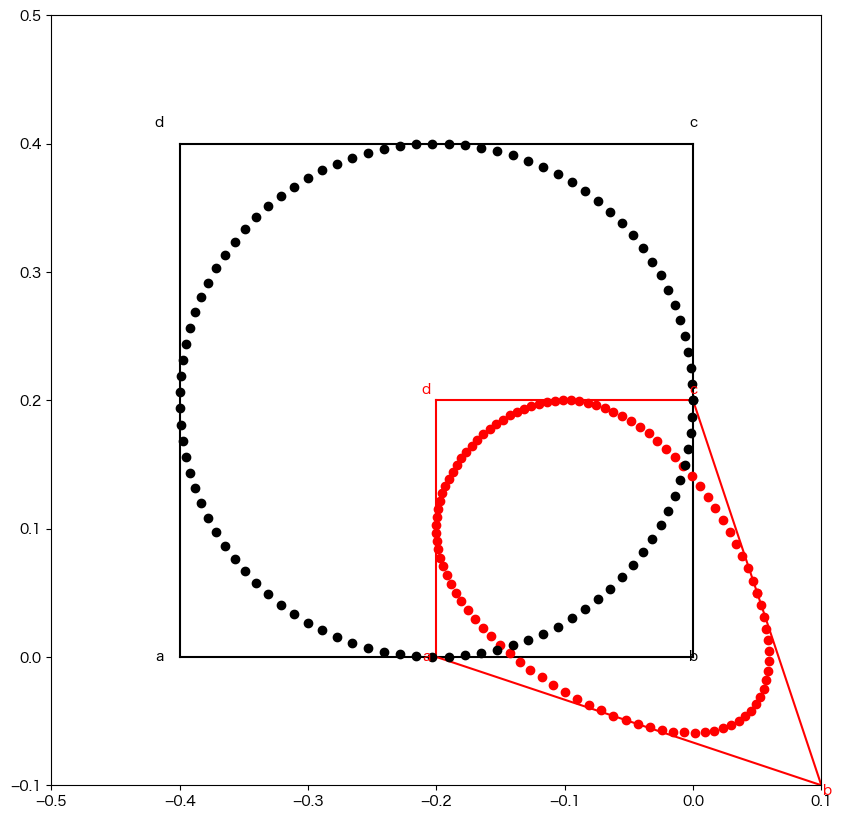

In [106]:
#円
thetas = np.linspace(0, 2*np.pi, 100)
ps_circle = []
for theta in thetas:
    ps_circle.append(Vector2(np.cos(theta)*0.2 - 0.2, np.sin(theta)*0.2 + 0.2))

#新しいメッシュ
a2 = Vector2(-0.2, 0.0)
b2 = Vector2( 0.1, -0.1)
c2 = Vector2( 0.0, 0.2)
d2 = Vector2(-0.2, 0.2)

fig, ax = plt.subplots(figsize=(10, 10))
drawMesh(ax, a, b, c, d, color="black")
drawMesh(ax, a2, b2, c2, d2, color="red")

for p_circle in ps_circle:
    center, l = getMeshParam(a, b, c, d)
    s, t = calcParam(o, p_circle, l)
    p_new = calcPosition(a2, b2, c2, d2, o, s, t)

    ax.plot(p_circle.x, p_circle.y, "o", color="black")
    ax.plot(p_new.x, p_new.y, "o", color="red")
ax.set_aspect("equal")
plt.show()

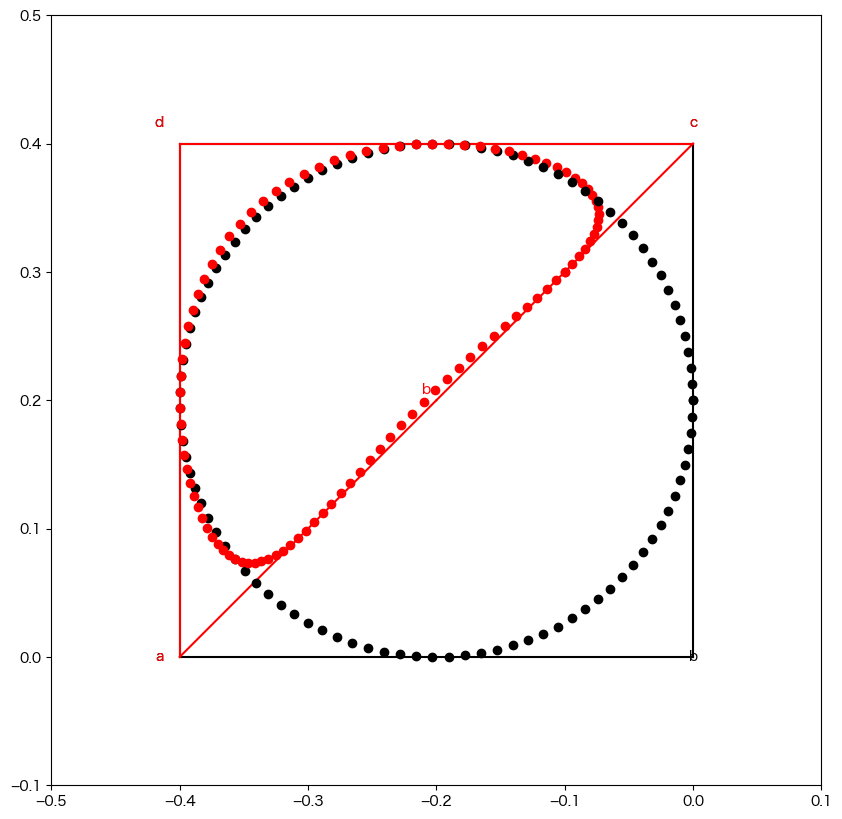

In [108]:
#円
thetas = np.linspace(0, 2*np.pi, 100)
ps_circle = []
for theta in thetas:
    ps_circle.append(Vector2(np.cos(theta)*0.2 - 0.2, np.sin(theta)*0.2 + 0.2))

#新しいメッシュ
a2 = Vector2(-0.4, 0.0)
b2 = Vector2( -0.2, 0.2)
c2 = Vector2( 0.0, 0.4)
d2 = Vector2(-0.4, 0.4)

fig, ax = plt.subplots(figsize=(10, 10))
drawMesh(ax, a, b, c, d, color="black")
drawMesh(ax, a2, b2, c2, d2, color="red")

for p_circle in ps_circle:
    center, l = getMeshParam(a, b, c, d)
    s, t = calcParam(o, p_circle, l)
    p_new = calcPosition(a2, b2, c2, d2, o, s, t)

    ax.plot(p_circle.x, p_circle.y, "o", color="black")
    ax.plot(p_new.x, p_new.y, "o", color="red")
ax.set_aspect("equal")
plt.show()